In [1]:
import re  #for regular expressions
import nltk #for text manipulation
import string
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option("display.max_colwidth",200)
warnings.filterwarnings("ignore",category=DeprecationWarning)

%matplotlib inline

import os
import pandas as pd
import sys, os
print(os.listdir())
os.chdir(r'C:\Users\vmukku\Desktop\TableauCourse\tweet')
print(os.listdir())
train=pd.read_csv('train_tweet.csv',encoding='ISO-8859-1')
test=pd.read_csv('test_tweet.csv',encoding='ISO-8859-1')
#train.head()
#test.head()

['.ipynb_checkpoints', '1749596_CNOTE17225233_20210125.zip', '1749596_RTNS_20210125.zip', '1749596_Sett_25012021.zip', 'attribute.html', 'aws', 'aws.docx', 'BillDesk - All Your Payments. Single Location.pdf', 'BillDesk - All Your Payments. Single Location1.pdf', 'calck', 'conditions.ipynb', 'data.csv', 'decendant.html', 'djangoex1.ipynb', 'DSclasses', 'edx', 'ex1.html', 'ex2.html', 'example1.html', 'expenses.xlsx', 'Finacle e-Banking_ Account Details.pdf', 'firstpython.ipynb', 'Flexbox.html', 'functions.ipynb', 'googldigitalmarketing', 'grid.html', 'helloworld.js', 'hover.html', 'kcalc.ipynb', 'loanprediction.ipynb', 'new 2.html', 'nlp.ipynb', 'Nutrition__Physical_Activity__and_Obesity_-_Youth_Risk_Behavior_Surveillance_System.csv', 'openingfile.ipynb', 'OpenShot-v2.5.1-x86_64.exe', 'P1-SuperStoreUS-2015.xlsx', 'P1.csv', 'prject0.1.ipynb', 'project1.ipynb', 'readings.txt', 'responsive.html', 'salesforce', 'Sample-Superstore.xls', 'shares2.xlsx', 'table-2.xls', 'title1.html', 'train1.cs

In [2]:
#Data Inspection
#Data Cleaning
train[train['label']==0].head(10)
train[train['label']==1].head(10)

,id,label,tweet
13,14,1,@user #cnn calls #michigan middle school 'build the wall' chant '' #tcot
14,15,1,no comment! in #australia #opkillingbay #seashepherd #helpcovedolphins #thecove #helpcovedolphins
17,18,1,retweet if you agree!
23,24,1,@user @user lumpy says i am a . prove it lumpy.
34,35,1,it's unbelievable that in the 21st century we'd need something like this. again. #neverump #xenophobia
56,57,1,@user lets fight against #love #peace
68,69,1,Ã°ÂÂÂ©the white establishment can't have blk folx running around loving themselves and promoting our greatness
77,78,1,"@user hey, white people: you can call people 'white' by @user #race #identity #medÃ¢ÂÂ¦"
82,83,1,how the #altright uses &amp; insecurity to lure men into #whitesupremacy
111,112,1,@user i'm not interested in a #linguistics that doesn't address #race &amp; . racism is about #power. #raciolinguistics bringsÃ¢ÂÂ¦


In [3]:
#Let us check the dimensions of the train and test dataset
train.shape, test.shape

((31962, 3), (17197, 2))

In [4]:
#check the label-distribution in the train dataset (no of values)
train["label"].value_counts()

0    29720
1     2242
Name: label, dtype: int64

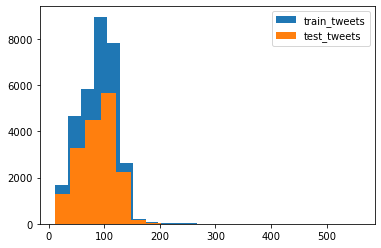

In [5]:
#check the distribution of length of the tweets, in terms of words, in bother test and train

length_train=train['tweet'].str.len()
length_test=test['tweet'].str.len()
plt.hist(length_train,bins=20,label="train_tweets")
plt.hist(length_test,bins=20,label="test_tweets")
plt.legend()
plt.show()

In [6]:
#Data Cleaning(combining two datasets)
combi=train.append(test, ignore_index=True)
combi.shape

(49159, 3)

In [7]:
#user-defined function to remove unwanted text patterns from the tweets.

def remove_pattern(input_txt, pattern):
    r= re.findall(pattern, input_txt)
    for i in r:
        input_txt=re.sub(i,'',input_txt)
    return input_txt

#1.removing twitter Handles (@,*,[])

combi['tidy_tweet']=np.vectorize(remove_pattern)(combi['tweet'],"@[\w]*")
combi.head()

,id,label,tweet,tidy_tweet
0,1,0.0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run
1,2,0.0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in urÃ°ÂÂÂ±!!! Ã°ÂÂÂÃ°ÂÂÂÃ°ÂÂÂÃ°ÂÂÂ Ã°ÂÂÂ¦Ã°ÂÂÂ¦Ã°ÂÂÂ¦,#model i love u take with u all the time in urÃ°ÂÂÂ±!!! Ã°ÂÂÂÃ°ÂÂÂÃ°ÂÂÂÃ°ÂÂÂ Ã°ÂÂÂ¦Ã°ÂÂÂ¦Ã°ÂÂÂ¦
4,5,0.0,factsguide: society now #motivation,factsguide: society now #motivation


In [8]:
#2.removing/replacing punctuations, numbers, and special characters

combi['tidy_tweet']= combi['tidy_tweet'].str.replace("[^a-zA-Z#]"," ")
combi.head(10)

,id,label,tweet,tidy_tweet
0,1,0.0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,when a father is dysfunctional and is so selfish he drags his kids into his dysfunction #run
1,2,0.0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,thanks for #lyft credit i can t use cause they don t offer wheelchair vans in pdx #disapointed #getthanked
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in urÃ°ÂÂÂ±!!! Ã°ÂÂÂÃ°ÂÂÂÃ°ÂÂÂÃ°ÂÂÂ Ã°ÂÂÂ¦Ã°ÂÂÂ¦Ã°ÂÂÂ¦,#model i love u take with u all the time in ur
4,5,0.0,factsguide: society now #motivation,factsguide society now #motivation
5,6,0.0,[2/2] huge fan fare and big talking before they leave. chaos and pay disputes when they get there. #allshowandnogo,huge fan fare and big talking before they leave chaos and pay disputes when they get there #allshowandnogo
6,7,0.0,@user camping tomorrow @user @user @user @user @user @user @user dannyÃ¢ÂÂ¦,camping tomorrow danny
7,8,0.0,the next school year is the year for exams.Ã°ÂÂÂ¯ can't think about that Ã°ÂÂÂ­ #school #exams #hate #imagine #actorslife #revolutionschool #girl,the next school year is the year for exams can t think about that #school #exams #hate #imagine #actorslife #revolutionschool #girl
8,9,0.0,we won!!! love the land!!! #allin #cavs #champions #cleveland #clevelandcavaliers Ã¢ÂÂ¦,we won love the land #allin #cavs #champions #cleveland #clevelandcavaliers
9,10,0.0,@user @user welcome here ! i'm it's so #gr8 !,welcome here i m it s so #gr


In [9]:
#3.Removing short words
combi['tidy_tweet']=combi['tidy_tweet'].apply(lambda x:' '.join([w for w in x.split() if len(w)>3]))
combi.head()

,id,label,tweet,tidy_tweet
0,1,0.0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,when father dysfunctional selfish drags kids into dysfunction #run
1,2,0.0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,thanks #lyft credit cause they offer wheelchair vans #disapointed #getthanked
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in urÃ°ÂÂÂ±!!! Ã°ÂÂÂÃ°ÂÂÂÃ°ÂÂÂÃ°ÂÂÂ Ã°ÂÂÂ¦Ã°ÂÂÂ¦Ã°ÂÂÂ¦,#model love take with time
4,5,0.0,factsguide: society now #motivation,factsguide society #motivation


In [10]:
#4.text normalization
tokenized_tweet = combi['tidy_tweet'].apply(lambda x: x.split())
tokenized_tweet.head()

0                [when, father, dysfunctional, selfish, drags, kids, into, dysfunction, #run]
1    [thanks, #lyft, credit, cause, they, offer, wheelchair, vans, #disapointed, #getthanked]
2                                                                     [bihday, your, majesty]
3                                                            [#model, love, take, with, time]
4                                                          [factsguide, society, #motivation]
Name: tidy_tweet, dtype: object

In [11]:
#now we can normalize the tokenized tweets
from nltk.stem.porter import *
stemmer = PorterStemmer()
tokenized_tweet = tokenized_tweet.apply(lambda x: [stemmer.stem(i) for i in x])

for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = ' '.join(tokenized_tweet[i])
combi['tidy_tweet']=tokenized_tweet
tokenized_tweet.head()

0                  when father dysfunct selfish drag kid into dysfunct #run
1    thank #lyft credit caus they offer wheelchair van #disapoint #getthank
2                                                       bihday your majesti
3                                                #model love take with time
4                                                  factsguid societi #motiv
Name: tidy_tweet, dtype: object

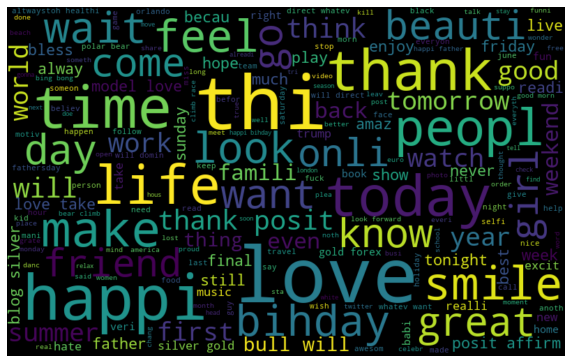

In [12]:
#visulization from tweets
all_words = ' '.join([text for text in combi['tidy_tweet']])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height = 500,random_state=21, max_font_size=110).generate(all_words)
plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation = "bilinear") 
plt.axis('off')
plt.show()

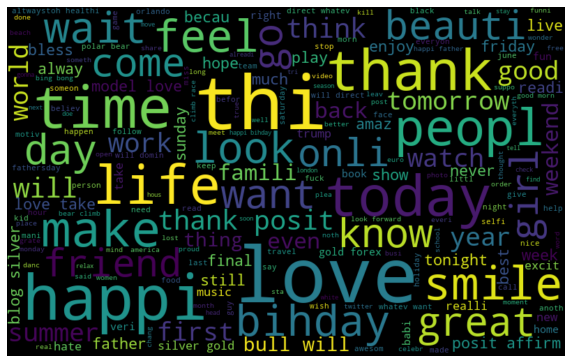

In [13]:
#Words in non racist/sexist tweets - visulization
normal_words = ' '.join([text for text in combi['tidy_tweet'][combi['label']==0]])
wordcloud = WordCloud(width=800, height = 500,random_state=21, max_font_size=110).generate(all_words)
plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation = "bilinear") 
plt.axis('off')
plt.show()

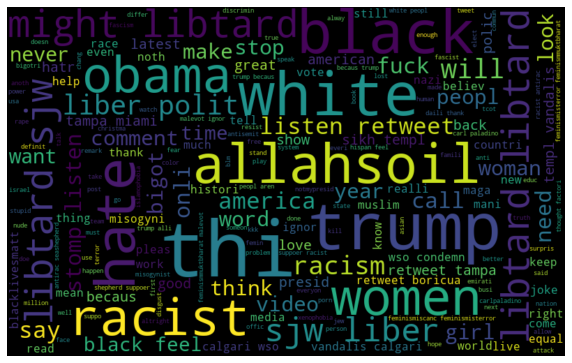

In [14]:
#Words in racist/sexist tweets - visulization
negative_words = ' '.join([text for text in combi['tidy_tweet'][combi['label'] == 1]])
wordcloud = WordCloud(width=800, height = 500,random_state=21, max_font_size=110).generate(negative_words)
plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation = "bilinear") 
plt.axis('off')
plt.show()

In [15]:
# Hastags on tweets sentiment 
#function to collect hastags
def hashtag_extract(x): 
    hashtags = []
    for i in x:
        ht = re.findall(r"#(\w+)",i)
        hashtags.append(ht)
    return hashtags

#extracting hashtags from non racist/sexist tweets
HT_regular=hashtag_extract(combi['tidy_tweet'][combi['label']==0])

#extracting hashtags from racist/sexist tweets
HT_negative = hashtag_extract(combi['tidy_tweet'][combi['label']==1])

#unnesting list
HT_regular = sum(HT_regular,[]) 
HT_negative = sum(HT_negative,[])

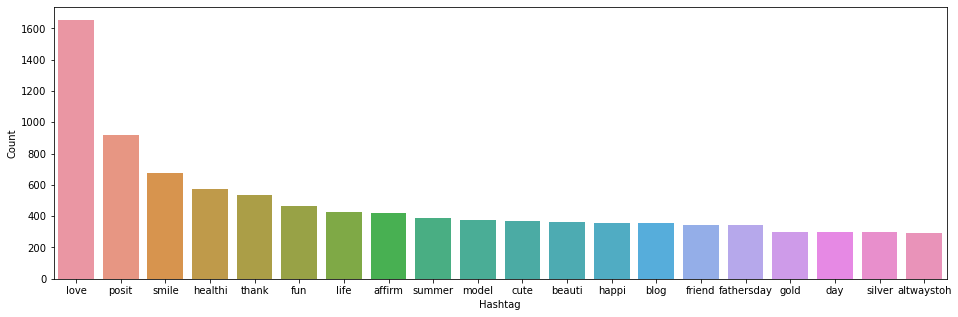

In [16]:
#non-racist/sexist tweets
a=nltk.FreqDist(HT_regular) 
d=pd.DataFrame({'Hashtag':list(a.keys()), 'Count':list(a.values())})

#selecting top 20 most frequent hashtags
d= d.nlargest(columns="Count", n=20)
plt.figure(figsize=(16,5)) 
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

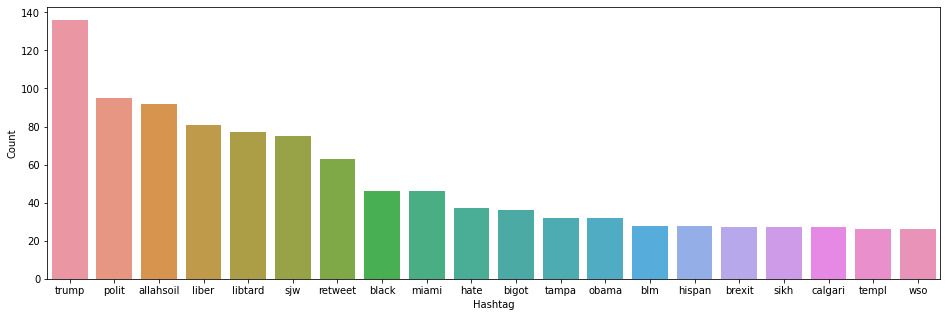

In [17]:
#racist/sexist tweets
b=nltk.FreqDist(HT_negative) 
e=pd.DataFrame({'Hashtag':list(b.keys()), 'Count':list(b.values())})

#selecting top 20 most frequent hashtags
e= e.nlargest(columns="Count", n=20)
plt.figure(figsize=(16,5)) 
ax = sns.barplot(data=e, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

In [18]:
#conda install -c anaconda gensim
#from sklearn.feature_extraction.text import 
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer 
import gensim

In [19]:
bow_vectorizer=CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
bow=bow_vectorizer.fit_transform(combi['tidy_tweet'])

In [20]:
bow.shape

(49159, 1000)

In [21]:
tfidf_vectorizer=TfidfVectorizer(max_df=0.90, min_df=2, max_features=1000,stop_words='english')
tfidf=tfidf_vectorizer.fit_transform(combi['tidy_tweet'])
tfidf.shape

(49159, 1000)

In [22]:
#Word to Vector Feature:
tokenized_tweet=combi['tidy_tweet'].apply(lambda x: x.split())
model_w2v = gensim.models.Word2Vec(
tokenized_tweet, size=200,
window=5,
min_count=2,
sg = 1,
hs = 0,
negative = 10,
workers = 2,
seed = 34)

In [23]:
model_w2v.train(tokenized_tweet, total_examples = len(combi['tidy_tweet']), epochs=20)

(6510714, 7536020)

In [24]:
model_w2v.wv.most_similar(positive="dinner")

[('spaghetti', 0.5881245136260986),
 ('#cellar', 0.5717356204986572),
 ('noodl', 0.5680463314056396),
 ('#avocado', 0.5648812055587769),
 ('#biall', 0.5587724447250366),
 ('enrout', 0.5544744729995728),
 ('dess', 0.5527253746986389),
 ('cookout', 0.550701379776001),
 ('burrito', 0.5494993329048157),
 ('#burrito', 0.5373833179473877)]

In [25]:
model_w2v.wv.most_similar(positive="trump")

[('donald', 0.5765299797058105),
 ('potu', 0.5306532382965088),
 ('phoni', 0.5270987749099731),
 ('hillari', 0.5252142548561096),
 ('nomine', 0.5222804546356201),
 ('unstabl', 0.5214586853981018),
 ('unfavor', 0.5207319855690002),
 ('endors', 0.5187678337097168),
 ('melo', 0.517514169216156),
 ('jibe', 0.5158687829971313)]

In [26]:
model_w2v['food']

array([-0.3215812 , -0.34755668, -0.20035782, -0.09273099, -0.09060041,
        0.06807037, -0.12342924,  0.13510552, -0.24843843,  0.11833017,
       -0.85411316, -0.20856784, -0.17978185, -0.9560954 ,  0.43869892,
       -0.05626243,  0.08731616, -0.21513323,  0.09785776,  0.80659   ,
        0.05737034, -0.21701217,  0.64543235, -0.30277717,  1.0782388 ,
        0.00741584, -0.49532807, -0.06809539, -0.65731144, -0.29279047,
       -0.08247595,  0.72269964,  0.3603213 , -0.18114352, -0.05669812,
        0.11760609, -0.0732721 , -0.37564147,  0.02236361, -0.4596048 ,
       -0.4064901 ,  0.4733616 , -0.34026346, -0.47433823,  0.7103294 ,
       -0.5914472 ,  0.56085896, -0.11410819, -0.34279668, -0.39461103,
       -0.20681047, -0.65444434, -0.08529506, -0.84112686, -0.10387405,
       -0.3589097 , -0.15597875,  0.03239803,  0.01667179,  0.16753207,
       -0.655912  , -0.15650804,  0.20038319,  0.12703572,  1.1945984 ,
        0.16543666,  0.20622106, -0.08458969,  0.32815233,  0.63

In [27]:
len(model_w2v['food'])

200

In [28]:
def word_vector(tokens, size):
    vec = np.zeros(size).reshape((1, size))
    count = 0.
    for word in tokens:
        try:
            vec+=model_w2v[word].reshape((1, size))
            count +=1.
        except KeyError:
            continue
    if count !=0:
        vec /=count
    return vec

In [29]:
wordvec_arrays = np.zeros((len(tokenized_tweet), 200))
for i in range(len(tokenized_tweet)):
    wordvec_arrays[i,:] = word_vector(tokenized_tweet[i], 200)
    wordvec_df = pd.DataFrame(wordvec_arrays)
wordvec_df.shape

(49159, 200)

In [30]:
#Doc2VecEmbedding
from tqdm import tqdm
tqdm.pandas(desc="progress-bar")
from gensim.models.doc2vec import LabeledSentence

C:\Users\vmukku\anaconda3\lib\site-packages\tqdm\std.py:697: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel


In [31]:
#labelise or tag each tokenised tweet with unique IDs
def add_label(twt):
    output = []
    for i, s in zip(twt.index, twt):
        output.append(LabeledSentence(s, ["tweet_"+str(i)]))
    return output

labeled_tweets = add_label(tokenized_tweet)
#Output-Result
labeled_tweets[:6]

[LabeledSentence(words=['when', 'father', 'dysfunct', 'selfish', 'drag', 'kid', 'into', 'dysfunct', '#run'], tags=['tweet_0']),
 LabeledSentence(words=['thank', '#lyft', 'credit', 'caus', 'they', 'offer', 'wheelchair', 'van', '#disapoint', '#getthank'], tags=['tweet_1']),
 LabeledSentence(words=['bihday', 'your', 'majesti'], tags=['tweet_2']),
 LabeledSentence(words=['#model', 'love', 'take', 'with', 'time'], tags=['tweet_3']),
 LabeledSentence(words=['factsguid', 'societi', '#motiv'], tags=['tweet_4']),
 LabeledSentence(words=['huge', 'fare', 'talk', 'befor', 'they', 'leav', 'chao', 'disput', 'when', 'they', 'there', '#allshowandnogo'], tags=['tweet_5'])]

In [32]:
# DOC 2 VEC MODEL



model_d2v=gensim.models.Doc2Vec(dm=1, #dm=1 for 'distributed memory' mode
dm_mean=1, #dm=1 for using mean of the context word vectors
size=200, #no. of desired features
windows=5, #width of the context window
negative=7, #if>0 then negative sampling will be used
min_count=5, #Ignores all words with total frequency lower than 2.
workers=3, #no. of cores
alpha=0.1, #learning rate
seed=23)

model_d2v.build_vocab([i for i in tqdm(labeled_tweets)])
model_d2v.train(labeled_tweets, total_examples=len(combi['tidy_tweet']), epochs=15)

C:\Users\vmukku\anaconda3\lib\site-packages\gensim\models\doc2vec.py:319: UserWarning: The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.
  warnings.warn("The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.")
100%|██████████| 49159/49159 [00:00<00:00, 836553.25it/s]


In [33]:
#preparing doc2vec Feature Set

docvec_arrays=np.zeros((len(tokenized_tweet),200))
for i in range(len(combi)):
    docvec_arrays[i,:]=model_d2v.docvecs[i].reshape(1,200)
docvec_df=pd.DataFrame(docvec_arrays)
docvec_df.shape

(49159, 200)

In [34]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split 
from sklearn.metrics import f1_score 

In [35]:
# Bag of words Features

#Extracting train and test BoW features 
train_bow=bow[:31962,:]
test_bow=bow[31962:,:]

#splitting data into training and validation set 
xtrain_bow, xvalid_bow, ytrain, yvalid=train_test_split(train_bow, train['label'], random_state=42, test_size=0.3)
lreg=LogisticRegression()

#training the model 
lreg.fit(xtrain_bow,ytrain)

prediction=lreg.predict_proba(xvalid_bow) #predicting on the validation set
prediction_int=prediction[:,1] >= 0.3 
#if predicition is greater than or equal to 0.3 than 1 else 0 
prediciton_int =prediction_int.astype(np.int)
f1_score(yvalid, prediction_int) #calculate f1 score for the validation set


0.5303408146300915

In [36]:
test_pred=lreg.predict_proba(test_bow)
test_pred_int=test_pred[:,1]>=0.3
test_pred_int=test_pred_int.astype(np.int)
test['label']=test_pred_int
submission=test[['id','label']]
submission.to_csv('sub_lreg_bow.csv', index=False) #writing dta to 

In [37]:
# TI-IDF Features

#Extracting train and test tfidf features 
train_tfidf=tfidf[:31962,:]
test_tfidf=tfidf[31962:,:]

#splitting data into training and validation set 
xtrain_tfidf=train_tfidf[ytrain.index]
xvalid_tfidf=train_tfidf[yvalid.index]

#splitting data into training and validation set 
xtrain_tfidf, xvalid_tfidf, ytrain, yvalid=train_test_split(train_tfidf, train['label'], random_state=42, test_size=0.3)
lreg=LogisticRegression()

#training the model 
lreg.fit(xtrain_tfidf,ytrain)

prediction=lreg.predict_proba(xvalid_tfidf) #predicting on the validation set
prediction_int=prediction[:,1] >= 0.3 
#if predicition is greater than or equal to 0.3 than 1 else 0 
prediciton_int =prediction_int.astype(np.int)
f1_score(yvalid, prediction_int) #calculate f1 score for the validation set

0.5451327433628319

In [38]:
#Word2Vec Featurs


#Extracting train and test w2v features 
train_w2v=wordvec_df.iloc[:31962,:]
test_w2v=wordvec_df.iloc[31962:,:]

#splitting data into training and validation set 
#xtrain_w2v=train_w2v_iloc[ytrain.index,:]
#xvalid_w2v=train_w2v_iloc[yvalid.index,:]

#splitting data into training and validation set 
xtrain_w2v, xvalid_w2v, ytrain, yvalid=train_test_split(train_w2v, train['label'], random_state=42, test_size=0.3)
lreg=LogisticRegression()

#training the model 
lreg.fit(xtrain_w2v,ytrain)

prediction=lreg.predict_proba(xvalid_w2v) #predicting on the validation set
prediction_int=prediction[:,1] >= 0.3 
#if predicition is greater than or equal to 0.3 than 1 else 0 
prediciton_int =prediction_int.astype(np.int)
f1_score(yvalid, prediction_int) #calculate f1 score for the validation set

0.6132145508537491

In [39]:
#Doc2Vec Featurs

#Extracting train and test d2v features 
train_d2v=docvec_df.iloc[:31962,:]
test_d2v=docvec_df.iloc[31962:,:]

#splitting data into training and validation set 
#xtrain_w2v=train_w2v_iloc[ytrain.index,:]
#xvalid_w2v=train_w2v_iloc[yvalid.index,:]

#splitting data into training and validation set 
xtrain_d2v, xvalid_d2v, ytrain, yvalid=train_test_split(train_d2v, train['label'], random_state=42, test_size=0.3)
lreg=LogisticRegression()

#training the model 
lreg.fit(xtrain_d2v,ytrain)

prediction=lreg.predict_proba(xvalid_d2v) #predicting on the validation set
prediction_int=prediction[:,1] >= 0.3 
#if predicition is greater than or equal to 0.3 than 1 else 0 
prediciton_int =prediction_int.astype(np.int)
f1_score(yvalid, prediction_int) #calculate f1 score for the validation set

0.38275862068965516

In [40]:
# Support Vector Machine SVM

from sklearn import svm

#Bag-of-Words Features

svc=svm.SVC(kernel='linear', C=1, probability=True).fit(xtrain_bow,ytrain)
prediction=svc.predict_proba(xvalid_bow)
prediction_int = prediction[:,1]>=0.3
prediction_int = prediction_int.astype(np.int)
f1_score(yvalid, prediction_int)

0.5092936802973977

In [41]:
#test dataset and creating another submission file

test_pred = svc.predict_proba(test_bow)
test_pred_int = test_pred[:,1] >= 0.3
test_pred_int = test_pred_int.astype(np.int)
test['label'] = test_pred_int
submission = test[['id','label']]
submission.to_csv('sub_svm_bow.csv', index=False)

In [42]:
# TF-IDF Features

svc=svm.SVC(kernel='linear', C=1, probability=True).fit(xtrain_tfidf,ytrain)
prediction=svc.predict_proba(xvalid_tfidf)
prediction_int = prediction[:,1]>=0.3
prediction_int = prediction_int.astype(np.int)
f1_score(yvalid, prediction_int)

0.5105215004574565

In [43]:
# Word2Vector Features

svc=svm.SVC(kernel='linear', C=1, probability=True).fit(xtrain_w2v,ytrain)
prediction=svc.predict_proba(xvalid_w2v)
prediction_int = prediction[:,1]>=0.3
prediction_int = prediction_int.astype(np.int)
f1_score(yvalid, prediction_int)

0.6125290023201856

In [44]:
# Doc2Vector Features

svc=svm.SVC(kernel='linear', C=1, probability=True).fit(xtrain_d2v,ytrain)
prediction=svc.predict_proba(xvalid_d2v)
prediction_int = prediction[:,1]>=0.3
prediction_int = prediction_int.astype(np.int)
f1_score(yvalid, prediction_int)
print("Hello1")

Hello1


In [45]:
# RandomForest
print("Hello2")
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=400, random_state=11).fit(xtrain_bow, ytrain)
prediction=rf.predict(xvalid_bow)

#validation score 
f1_score(yvalid, prediction)


#predictions for the test dataset and create another submission file

#test_pred=rf.predict(test_bow) test['label']=test_pred submission=test[['id','label']]
#submission.to_csv('sub_rf_bow.csv',index=False)


Hello2


0.5529225908372828

In [46]:
print("TF-IDF Features")

rf=RandomForestClassifier(n_estimators=400, random_state=11).fit(xtrain_tfidf, ytrain)
prediction=rf.predict(xvalid_tfidf) 
f1_score(yvalid, prediction)

TF-IDF Features


0.562152133580705

In [47]:
print("Word2Vec Features")

rf=RandomForestClassifier(n_estimators=400, random_state=11).fit(xtrain_w2v, ytrain)
prediction=rf.predict(xvalid_w2v)
f1_score(yvalid, prediction)

Word2Vec Features


0.5053763440860215

In [48]:
print("Dov2Vec Features")

rf=RandomForestClassifier(n_estimators=400, random_state=11).fit(xtrain_d2v, ytrain)
prediction=rf.predict(xvalid_d2v)

f1_score(yvalid, prediction)

Dov2Vec Features


0.06770098730606489

In [49]:
#instal xgboost
!pip install xgboost
from xgboost import XGBClassifier
xgb_model=XGBClassifier(max_depth=6, n_estimators=1000).fit(xtrain_bow, ytrain) 
prediction =xgb_model.predict(xvalid_bow)
f1_score(yvalid, prediction)

test_pred=xgb_model.predict(test_bow)
test['label']=test_pred 
#submission=test[['id','label']] 
#submission.to_csv('sub_xgb_bow.csv', index=False)


C:\Users\vmukku\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:03:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [50]:
#TF-IDF Features

xgb=XGBClassifier(max_depth=6, n_estimators=1000, nthread=3).fit(xtrain_w2v, ytrain)
prediction=xgb.predict(xvalid_w2v)
f1_score(yvalid, prediction)

[23:03:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


0.6684636118598383

In [51]:
#Doc2Vec Features

xgb=XGBClassifier(max_depth=6, n_estimators=1000, nthread=3).fit(xtrain_d2v, ytrain)
prediction=xgb.predict(xvalid_d2v)
f1_score(yvalid, prediction)

[23:08:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


0.3789704271631983

In [52]:
#Fine Tuning XGBoost+Word2Vec
import xgboost as xgb

dtrain=xgb.DMatrix(xtrain_w2v, label=ytrain)
dvalid=xgb.DMatrix(xvalid_w2v, label=yvalid)
dtest=xgb.DMatrix(test_w2v)

#Parameters that we are going to tune

params= {
    'objective':'binary:logistic',
    'max_depth':6,
    'min_child_weight':1,
    'eta':.3,
    'subsample':1,
    'colsample_bytree':1
    }

def custom_eval(preds, dtrain):
    labels=dtrain.get_label().astype(np.int)
    preds=(preds >= 0.3).astype(np.int)
    return[('f1_score', f1_score(labels, preds))]


dtrain=xgb.DMatrix(xtrain_w2v, label=ytrain)
dvalid=xgb.DMatrix(xvalid_w2v, label=yvalid)
dtest=xgb.DMatrix(test_w2v)

#Parameters that we are going to tune

params= {
    'objective':'binary:logistic',
    'max_depth':6,
    'min_child_weight':1,
    'eta':.3,
    'subsample':1,
    'colsample_bytree':1
    }

def custom_eval(preds, dtrain):
    labels=dtrain.get_label().astype(np.int)
    preds=(preds >= 0.3).astype(np.int)
    return[('f1_score', f1_score(labels, preds))]


In [ ]:
# Tuning max_depth and min_child_weight

gridsearch_params=[
    (max_depth, min_child_weight)
    for max_depth in range(6,10)
    for min_child_weight in range(5,8)
    ]
max_f1=0. #initializing with 0
best_params=None
for max_depth, min_child_weight in gridsearch_params:
    print("CV with max_depth={}, min_child_weight={}".format(
            max_depth,
            min_child_weight))
        #Update our parameters
    params['max_depth']=max_depth
    params['min_child_weight']=min_child_weight

    #cross-validation
    cv_results=xgb.cv(params, 
            dtrain, 
            feval=custom_eval, 
            num_boost_round=200,
            maximize=True, 
            seed=16, 
            nfold=5,
            early_stopping_rounds=10)

CV with max_depth=6, min_child_weight=5
[23:14:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:14:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:14:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:14:35] WARNING: C:/Users/A

In [ ]:
#Finding best F1 Score
mean_f1=cv_results['test-f1_score-mean'].max()

boost_rounds=cv_results['test-f1_score-mean'].argmax()
print("\tF1 Score{} rounds".format(mean_f1, boost_rounds))
if mean_f1 > max_f1:
    max_f1=mean_f1
    best_params=(max_depth, min_child_weight)

print("Best params: {}, {}, F1 Score: {}".format(best_params[0], best_params[0], best_params[1], max_f1))
